In [8]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm

df=data=pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')


In [9]:
#Check the data types of the columns
data.dtypes


Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [10]:
#Get the numeric data into dataframe called numerical

numerical=data.select_dtypes(include=np.number)
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [11]:
#Get the categorical columns in a dataframe called categoricals

categorical = data.drop(numerical, axis=1)
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


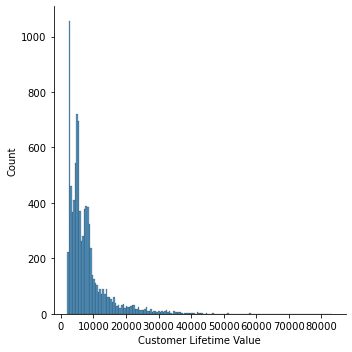

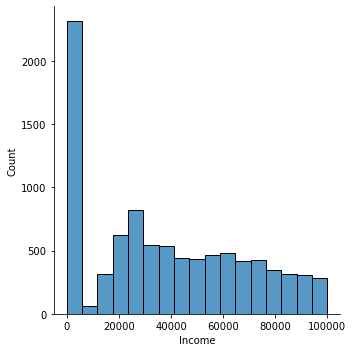

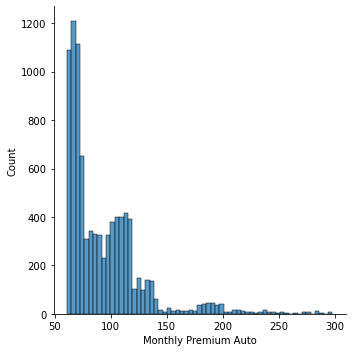

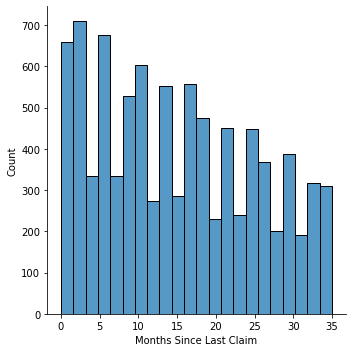

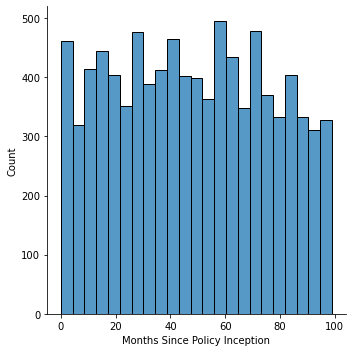

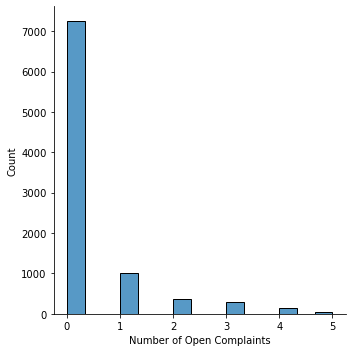

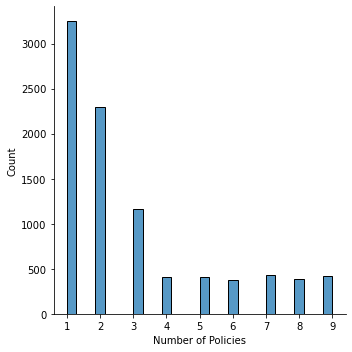

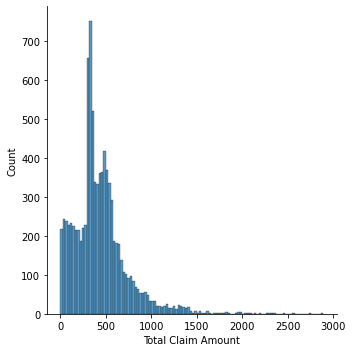

In [12]:
%matplotlib inline
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables

for x in numerical.columns:
    sns.displot(numerical[x])
plt.show()


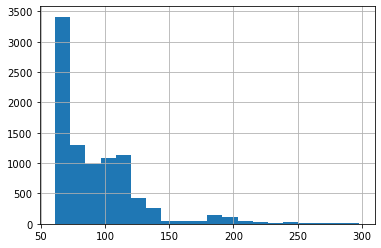

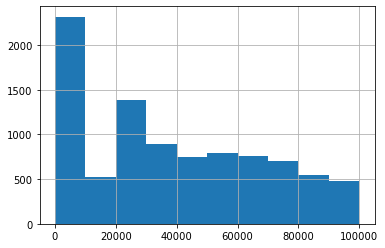

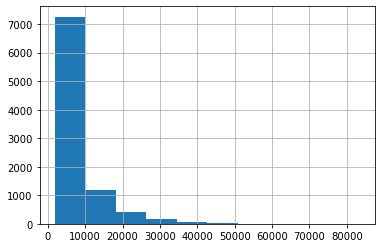

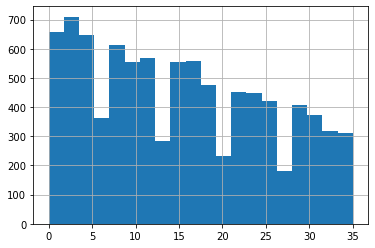

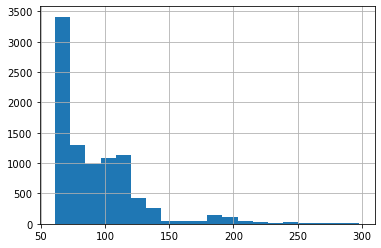

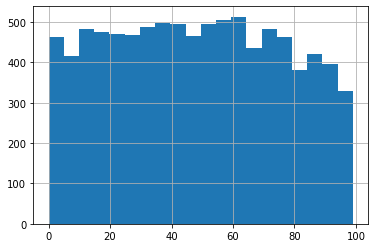

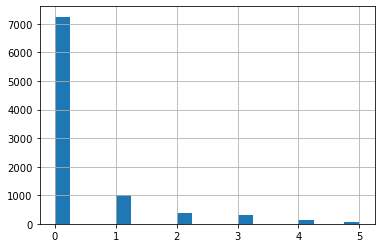

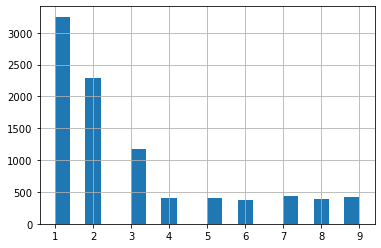

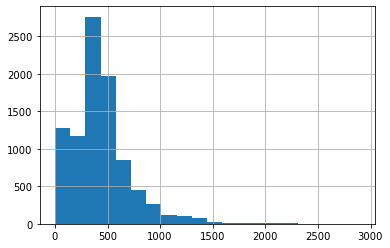

In [13]:
%matplotlib inline
#Use Matplotlib to construct histogram


data['Monthly Premium Auto'].hist(bins=20)
plt.show()

data['Income'].hist(bins = 10)
plt.show()

data['Customer Lifetime Value'].hist(bins = 10)
plt.show()

data['Months Since Last Claim'].hist(bins=20)
plt.show()

data['Monthly Premium Auto'].hist(bins=20)
plt.show()

data['Months Since Policy Inception'].hist(bins=20)
plt.show()
    
data['Number of Open Complaints'].hist(bins=20)
plt.show()    

    
data['Number of Policies'].hist(bins=20)
plt.show() 


data['Total Claim Amount'].hist(bins=20)
plt.show() 


In [14]:
numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [15]:
numerical.describe(percentiles=None, include=None, exclude=None)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [16]:
#For the numerical variables, check the multicollinearity between the features.Please note that we will use the column
#total_claim_amount later as the target variable.Drop one of the two features that show a high correlation between them (greater than 0.9). 
#Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have 
#a high correlation, then do not drop any features

corr_matrix = numerical.corr().abs()
corr_matrix


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,0.036343,0.021955,0.226451
Income,0.024366,1.000000,0.016665,0.026715,0.000875,0.006408,0.008656,0.355254
Monthly Premium Auto,0.396262,0.016665,1.000000,0.005026,0.020257,0.013122,0.011233,0.632017
Months Since Last Claim,0.011517,0.026715,0.005026,1.000000,0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,0.000875,0.020257,0.042959,1.000000,0.001158,0.013333,0.003335
Number of Open Complaints,0.036343,0.006408,0.013122,0.005354,0.001158,1.000000,0.001498,0.014241
Number of Policies,0.021955,0.008656,0.011233,0.009136,0.013333,0.001498,1.000000,0.002354
Total Claim Amount,0.226451,0.355254,0.632017,0.007563,0.003335,0.014241,0.002354,1.000000


<AxesSubplot:>

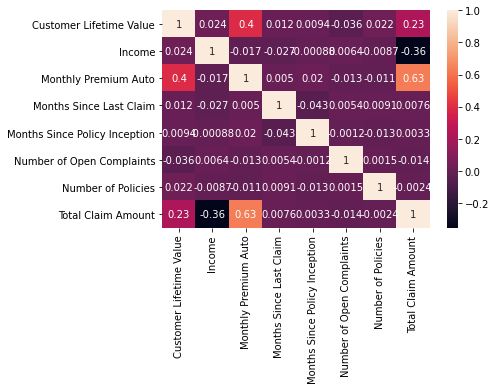

In [467]:
import seaborn as sns

# calculate the correlation matrix
corr = numerical.corr() 

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

<AxesSubplot:>

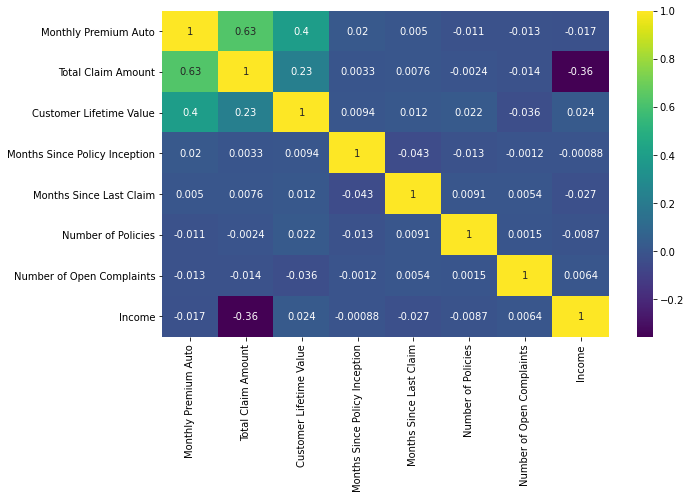

In [17]:
k = 12 #number of variables for heatmap
cols = numerical.corr().nlargest(k, 'Monthly Premium Auto')['Total Claim Amount'].index
cm = numerical[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [ ]:
# There is no pair of features that have correlation greater than 0.9,so we dont drop any column